# LOS (Encounter)

# Data Science and Machine Learning

# Project 2020

In [1]:
import pandas as pd
import numpy as np
import math

#to plot within notebook
import matplotlib as plt
%matplotlib inline

import datetime as dt
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle
from sklearn.externals import joblib
from sklearn import datasets

In [2]:
#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("../Datasets/Encounter/encounter.csv")

In [3]:
#number of rows and column in the dataset
df.shape

(5447, 28)

In [4]:
df.head(5)

,Provider_Org,Encounter_ID,Member_ID,Provider_ID,Provider_NPI,Clinic_ID,Encounter_DateTime,Encounter_Description,CC,Episode_ID,...,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count,Has_Appt,SOAP_Note,consult_ordered,Disposition
0,ExactData Medical Health System,L8694502508698944760,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-06-30T19:15:00Z,Lacy visited primary care physician on 6/30/20...,mild occasional lightheadedness,L8694502508698944760,...,1,0,7,0,1,0,True,s:a 33 year old female crystallographer presen...,NaN,ReleasedWithoutLimitations
1,ExactData Medical Health System,V3046573432409333612,568001602-01,523808810,1380097962,Corner Drug Store,2005-07-01T23:44:00Z,Lacy visited pharmacy on 7/1/2005 6:44:00 PM f...,NaN,L8694502508698944760,...,0,1,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
2,ExactData Medical Health System,X3228783097331248888,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-07-05T14:54:00Z,Lacy visited medical lab on 7/5/2005 9:54:00 A...,NaN,L8694502508698944760,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
3,ExactData Medical Health System,M3204724885018391695,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-10-07T15:45:00Z,Lacy visited primary care physician on 10/7/20...,NaN,M3204724885018391695,...,0,0,7,0,1,1,True,s:33 yr old female crystallographer presents t...,NaN,ReleasedWithoutLimitations
4,ExactData Medical Health System,G7012345417035113309,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-10-12T20:33:00Z,Lacy visited medical lab on 10/12/2005 3:33:00...,NaN,M3204724885018391695,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations


In [5]:
#Get summary of numerical variables
df.describe()

,Provider_ID,Provider_NPI,Facility_Name,lab_orders_count,lab_results_count,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count
count,5.447000e+03,5.447000e+03,0.0,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000,5447.000000
mean,5.407194e+08,2.059532e+09,NaN,0.676336,1.066459,0.140261,0.215899,3.348999,0.040573,0.502478,0.069396
std,2.544013e+08,5.876596e+08,NaN,1.738737,1.315180,0.347818,0.414151,3.497062,0.208184,0.508777,0.292446
min,1.085816e+08,1.032123e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.610516e+08,1.684152e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.196257e+08,2.056627e+09,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.340647e+08,2.531463e+09,NaN,0.000000,2.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000
max,9.934232e+08,2.982693e+09,NaN,15.000000,7.000000,2.000000,2.000000,7.000000,2.000000,2.000000,4.000000


In [6]:
#Get summary of non numerical variables
#df['Member_ID'].value_counts()

In [7]:
#the number of missing values in each column
# df.apply(lambda x: sum(x.isnull()),axis=0) 
# df.dtypes

In [8]:
#Converting date to format day-month-year
# .apply(lambda x: dt.datetime.strftime(x, '%d-%m-%Y'))
df['Encounter_DateTime'] = pd.to_datetime(df['Encounter_DateTime']).dt.date
# df['Encounter_DateTime'].dt.date.head(50)
df.head(5)

,Provider_Org,Encounter_ID,Member_ID,Provider_ID,Provider_NPI,Clinic_ID,Encounter_DateTime,Encounter_Description,CC,Episode_ID,...,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count,Has_Appt,SOAP_Note,consult_ordered,Disposition
0,ExactData Medical Health System,L8694502508698944760,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-06-30,Lacy visited primary care physician on 6/30/20...,mild occasional lightheadedness,L8694502508698944760,...,1,0,7,0,1,0,True,s:a 33 year old female crystallographer presen...,NaN,ReleasedWithoutLimitations
1,ExactData Medical Health System,V3046573432409333612,568001602-01,523808810,1380097962,Corner Drug Store,2005-07-01,Lacy visited pharmacy on 7/1/2005 6:44:00 PM f...,NaN,L8694502508698944760,...,0,1,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
2,ExactData Medical Health System,X3228783097331248888,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-07-05,Lacy visited medical lab on 7/5/2005 9:54:00 A...,NaN,L8694502508698944760,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
3,ExactData Medical Health System,M3204724885018391695,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-10-07,Lacy visited primary care physician on 10/7/20...,NaN,M3204724885018391695,...,0,0,7,0,1,1,True,s:33 yr old female crystallographer presents t...,NaN,ReleasedWithoutLimitations
4,ExactData Medical Health System,G7012345417035113309,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-10-12,Lacy visited medical lab on 10/12/2005 3:33:00...,NaN,M3204724885018391695,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations


In [9]:
series = df['Encounter_DateTime'].value_counts()
series = pd.DataFrame(series)
# Reset the index of dataframe
series = series.reset_index()
series.columns = ['Date', 'Patient']
# **********
# series['Patient'] = np.random.randint(10,1000, size=len(series))
# **********
# sorting usind the date
series_summary = series.sort_values(by=['Date'], ascending=True)
series_summary.tail(10)
series_summary.shape

(2376, 2)

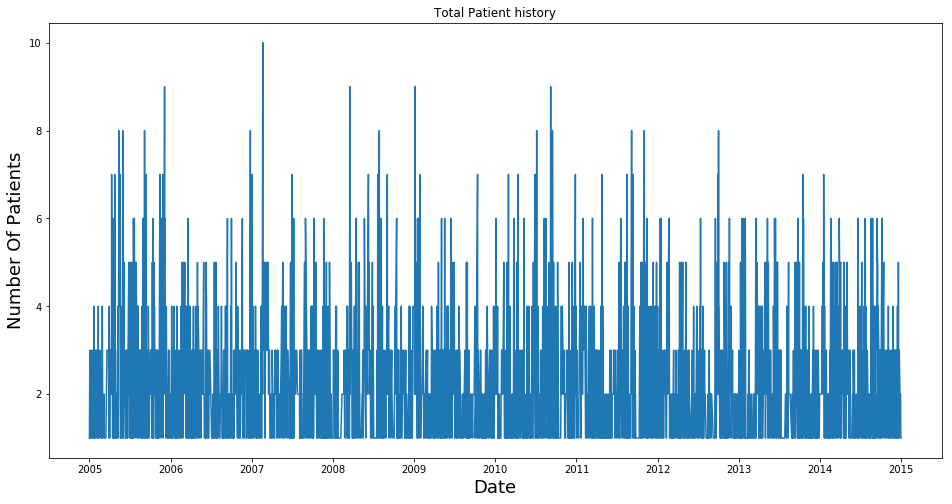

In [10]:
#setting index as date
#df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
series_summary.index = series_summary['Date']
# series_summary.drop('Date', axis=1, inplace=True)

#plot
pyplot.figure(figsize=(16,8))
pyplot.title('Total Patient history')
pyplot.plot(series_summary['Patient'])
pyplot.xlabel('Date',fontsize=18)
pyplot.ylabel('Number Of Patients',fontsize=18)
pyplot.show()
# pyplot.plot(series_summary['Patient'], label='Total Patient history')
# series_summary

# Model Long Short Term Memory (LSTM)

# Days 

In [12]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [13]:
#creating dataframe
data = series_summary.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(series_summary)),columns=['Date', 'Patient'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Patient'][i] = data['Patient'][i]
# new_data

In [14]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
# new_data
new_data.to_csv(r'..\Datasets\Encounter\Cleaned\dailyEncounter.csv')

In [41]:
#Get summary of numerical variables
new_data.describe()

,Patient
count,2376
unique,10
top,1
freq,919


In [42]:
new_data.Patient.min()

1

In [43]:
new_data.Patient.max()

10

In [136]:
#Converting the dataframe to a numpy array
dataset = new_data.values
# #Get /Compute the number of rows to train the model on
# training_data_len = math.ceil( len(dataset) *.8)
# training the whole dataset
training_data_len = len(dataset)
#Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
#Create the scaled training data set 
train = scaled_data[0:training_data_len  , : ]
#OR
#creating train and test sets
# train = dataset[0:training_data_len,:]
# valid = dataset[training_data_len:,:]
# new_data
# train
# training_data_len

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [81]:
#converting dataset into x_train and y_train
# x_train, y_train = train[:, :-1], train[:,-1]
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(train[i-60:i,0])
    y_train.append(train[i,0])
#OR
# for i in range(60,len(train)):
#     x_train.append(scaled_data[i-60:i,0])
#     y_train.append(scaled_data[i,0])

#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [82]:
# create and fit the LSTM network
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.1))

# Adding the output layer
# model.add(Dense(units=25))
model.add(Dense(units=1))
# model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model
# model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2)
model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=2)

Train on 2316 samples
Epoch 1/20
2316/2316 - 10s - loss: 0.0305
Epoch 2/20
2316/2316 - 4s - loss: 0.0271
Epoch 3/20
2316/2316 - 4s - loss: 0.0269
Epoch 4/20
2316/2316 - 4s - loss: 0.0270
Epoch 5/20
2316/2316 - 4s - loss: 0.0267
Epoch 6/20
2316/2316 - 5s - loss: 0.0269
Epoch 7/20
2316/2316 - 5s - loss: 0.0269
Epoch 8/20
2316/2316 - 4s - loss: 0.0268
Epoch 9/20
2316/2316 - 4s - loss: 0.0269
Epoch 10/20
2316/2316 - 4s - loss: 0.0268
Epoch 11/20
2316/2316 - 4s - loss: 0.0267
Epoch 12/20
2316/2316 - 4s - loss: 0.0269
Epoch 13/20
2316/2316 - 4s - loss: 0.0267
Epoch 14/20
2316/2316 - 4s - loss: 0.0269
Epoch 15/20
2316/2316 - 4s - loss: 0.0268
Epoch 16/20
2316/2316 - 4s - loss: 0.0269
Epoch 17/20
2316/2316 - 4s - loss: 0.0268
Epoch 18/20
2316/2316 - 5s - loss: 0.0268
Epoch 19/20
2316/2316 - 4s - loss: 0.0269
Epoch 20/20
2316/2316 - 4s - loss: 0.0269


In [83]:
# Create the distribution strategy
# mirrored_strategy = tf.distribute.MirroredStrategy()
# with mirrored_strategy.scope():
#     model = model

In [84]:
# #Test data set
# test_data = scaled_data[training_data_len - 60: , : ]
#Test data set on tomorrow 
test_data = scaled_data[training_data_len-4 - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
# y_test =  dataset[training_data_len : , : ]
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
#Convert x_test to a numpy array 
x_test = np.array(x_test)
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling
#OR
#predicting 246 values, using past 60 from the train data
# inputs = new_data[len(new_data) - len(valid) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs  = scaler.transform(inputs)

# X_test = []
# for i in range(60,inputs.shape[0]):
#     X_test.append(inputs[i-60:i,0])
# X_test = np.array(X_test)

# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# patients_no = model.predict(X_test)
# patients_no = scaler.inverse_transform(patients_no)

In [85]:
test_data.shape

(64, 1)

In [86]:
predictions

array([[2.2139692],
       [2.2093165],
       [2.1891477],
       [2.132629 ]], dtype=float32)

In [87]:
x_test.shape

(4, 60, 1)

# Results

In [75]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse
#OR
# rms=np.sqrt(np.mean(np.power((valid-patients_no),2)))
# rms

1.4273733506928779

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


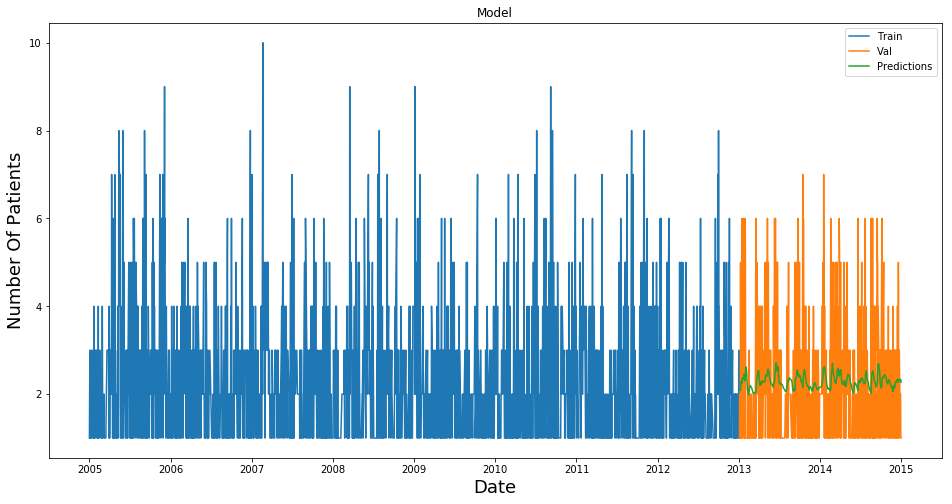

In [76]:
#Plot/Create the data for the graph
train = new_data[:training_data_len]
valid = new_data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
pyplot.figure(figsize=(16,8))
pyplot.title('Model')
pyplot.xlabel('Date', fontsize=18)
pyplot.ylabel('Number Of Patients', fontsize=18)
pyplot.plot(train['Patient'])
pyplot.plot(valid[['Patient', 'Predictions']])
pyplot.legend(['Train', 'Val', 'Predictions'], loc='upper right')
pyplot.show()
#OR
#for plotting
# train = new_data[:1900]
# valid = new_data[1900:]
# valid['Predictions'] = patients_no
# pyplot.figure(figsize=(20,10))
# pyplot.plot(train['Patient'])
# pyplot.plot(valid[['Patient','Predictions']])
#plot
# pyplot.figure(figsize=(16,8))
# pyplot.plot(series_summary['Quantity'], label='Total Quantity history')

In [77]:
#Show the valid and predicted prices
valid.head(5)
# valid.shape
#OR
# actual = pd.DataFrame(new_data['Patient'].tail(9))
# predicted = pd.DataFrame(valid['Predictions'])
# compare = actual.join(predicted)
# compare

,Patient,Predictions
Date,,
2013-01-03,1,2.110473
2013-01-04,2,2.096902
2013-01-07,1,2.100698
2013-01-08,5,2.089244
2013-01-09,3,2.177308


In [88]:
# pickle.dump(model, 'model.pkl', 'wb')
# pickle.dump(model, open('encounter_model_LSTM.pkl', 'wb'))
# joblib.dump(model, 'model.pkl')
model.save('daily_encounter_model_LSTM.h5')
model.save('encounter_model_LSTM.h5')

In [130]:
# loaded_model = joblib.load('encounter_model_LSTM.pkl')
# loaded_model = pickle.load(open("encounter_model_LSTM.pkl", "rb"))
loaded_model = tf.keras.models.load_model('daily_encounter_model_LSTM.h5')
loaded_model = tf.keras.models.load_model('daily_encounter_model_LSTM.h5')

In [131]:
loaded_model

In [132]:
# Export Pandas DataFrame to a CSV File
dailyEncounter = pd.read_csv("../Datasets/Encounter/Cleaned/dailyEncounter.csv")
#setting index as date
dailyEncounter['Date'] = pd.to_datetime(dailyEncounter.Date,format='%Y-%m-%d')
dailyEncounter.index = dailyEncounter['Date']
dailyEncounter.drop('Date', axis=1, inplace=True)
#Converting the dataframe to a numpy array
daily_dataset = dailyEncounter.values
#Get teh last 60 day closing price 
last_60_days = dailyEncounter[-60:].values
#Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
daily_scaled_data = scaler.fit_transform(daily_dataset)
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Predict Only One Day

In [133]:
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = loaded_model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)

In [134]:
pred_price

array([[2.0625155]], dtype=float32)

# Predict Multiple Days

In [138]:
data_len = len(dataset)
#Test data set
loaded_test_data = daily_scaled_data[data_len-4 - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
# y_test =  dataset[training_data_len : , : ]
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(loaded_test_data)):
    x_test.append(loaded_test_data[i-60:i,0])
#Convert x_test to a numpy array 
x_test = np.array(x_test)
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#Getting the models predicted price values
pred_price = loaded_model.predict(x_test) 
pred_price = scaler.inverse_transform(pred_price)#Undo scaling

In [139]:
pred_price

array([[2.2139692],
       [2.2093165],
       [2.1891477],
       [2.132629 ]], dtype=float32)

In [140]:
loaded_test_data.shape

(64, 1)

In [145]:
# convert numpy array to json
import json
lists = pred_price.tolist()
json_str = json.dumps(lists)
json_str
# lists

'[[2.2139692306518555], [2.2093164920806885], [2.189147710800171], [2.132628917694092]]'

In [146]:
import random
for i in range(0,len(lists)):
#     print (lists[i][0])
    if(lists[i][0] < 2):
        lists[i][0] = random.randint(1,3)
    if(lists[i][0] > 2.5):
        lists[i][0] = random.randint(8,10)
    else:
        lists[i][0] = random.randint(3,8)
lists

[[3], [4], [6], [5]]

In [183]:
len(pred_price)
pred_price[0,0]
pred = {}
for i in range(0,len(pred_price)):
    pred[str(i)] =str(pred_price[i,0])
pred
json.dumps(pred)
# print(json.dumps(["apple", "bananas"]))
# tuplex = ()
# pred = list(tuplex) 
# for i in range(0,len(pred_price)):
#     pred.append(pred_price[i,0])
# json.dumps(str(pred))

'{"0": "2.2139692", "1": "2.2093165", "2": "2.1891477", "3": "2.132629"}'

In [98]:
for i in range(5, 10):
    print(i)

5
6
7
8
9


# Months

In [31]:
# extract only the encounter date column
monthly_series = df['Encounter_DateTime']
monthly_series = pd.DataFrame(monthly_series)
monthly_series.head(10)

,Encounter_DateTime
0,2005-06-30
1,2005-07-01
2,2005-07-05
3,2005-10-07
4,2005-10-12
5,2005-03-12
6,2005-04-19
7,2005-04-22
8,2005-04-26
9,2005-10-20


In [32]:
# trim date to only have year and month
monthly_series['Encounter_DateTime'] = pd.to_datetime(monthly_series['Encounter_DateTime']).dt.to_period('m')
monthly_series.head(10)

,Encounter_DateTime
0,2005-06
1,2005-07
2,2005-07
3,2005-10
4,2005-10
5,2005-03
6,2005-04
7,2005-04
8,2005-04
9,2005-10


In [33]:
# get counts of every date
monthly_series_summary = monthly_series.groupby('Encounter_DateTime').size().reset_index().rename(columns={0: 'Patient'})
monthly_series_summary.columns = ['Date', 'Patient']
monthly_series_summary.head(10)

,Date,Patient
0,2005-01,37
1,2005-02,32
2,2005-03,25
3,2005-04,79
4,2005-05,69
5,2005-06,51
6,2005-07,74
7,2005-08,56
8,2005-09,67
9,2005-10,61


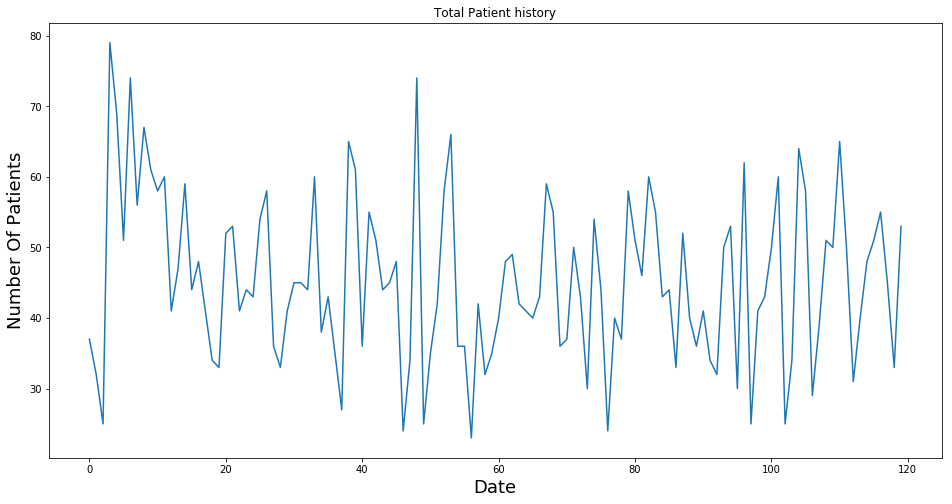

In [82]:
#plot
pyplot.figure(figsize=(16,8))
pyplot.title('Total Patient history')
pyplot.plot(monthly_series_summary['Patient'])

# ax = fig.add_subplot(111)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
pyplot.xlabel('Date',fontsize=18)
pyplot.ylabel('Number Of Patients',fontsize=18)
pyplot.show()
# pyplot.plot(monthly_series_summary['Patient'], label='Total Patient history')

In [34]:
#setting index as date
monthly_series_summary.index = monthly_series_summary['Date']
# series_summary.drop('Date', axis=1, inplace=True)
monthly_series_summary.head(10)

,Date,Patient
Date,,
2005-01,2005-01,37
2005-02,2005-02,32
2005-03,2005-03,25
2005-04,2005-04,79
2005-05,2005-05,69
2005-06,2005-06,51
2005-07,2005-07,74
2005-08,2005-08,56
2005-09,2005-09,67


In [35]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [36]:
#creating dataframe
monthly_data = monthly_series_summary.sort_index(ascending=True, axis=0)
monthly_new_data = pd.DataFrame(index=range(0,len(monthly_series_summary)),columns=['Date', 'Patient'])
for i in range(0,len(monthly_data)):
    monthly_new_data['Date'][i] = monthly_data['Date'][i]
    monthly_new_data['Patient'][i] = monthly_data['Patient'][i]
monthly_new_data.head(10)

,Date,Patient
0,2005-01,37
1,2005-02,32
2,2005-03,25
3,2005-04,79
4,2005-05,69
5,2005-06,51
6,2005-07,74
7,2005-08,56
8,2005-09,67
9,2005-10,61


In [37]:
#setting index
monthly_new_data.index = monthly_new_data.Date
monthly_new_data.drop('Date', axis=1, inplace=True)
# monthly_new_data
monthly_new_data.to_csv(r'..\Datasets\Encounter\Cleaned\monthlyEncounter.csv')

In [44]:
#Get summary of numerical variables
monthly_new_data.describe()

,Patient
count,120
unique,44
top,41
freq,7


In [45]:
monthly_new_data.Patient.max()

79

In [46]:
monthly_new_data.Patient.min()

23

In [87]:
#Converting the dataframe to a numpy array
monthly_dataset = monthly_new_data.values
# #Get /Compute the number of rows to train the model on
# monthly_training_data_len = math.ceil( len(monthly_dataset) *.8)
# training the whole dataset
monthly_training_data_len = len(monthly_dataset)
#Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
monthly_scaled_data = scaler.fit_transform(monthly_dataset)
#Create the scaled training data set 
monthly_train = monthly_scaled_data[0:monthly_training_data_len  , : ]
monthly_training_data_len

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


120

In [88]:
#converting dataset into x_train and y_train
# x_train, y_train = train[:, :-1], train[:,-1]
x_train, y_train = [], []
for i in range(60,len(monthly_train)):
    x_train.append(monthly_train[i-60:i,0])
    y_train.append(monthly_train[i,0])

#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [89]:
# create and fit the LSTM network
monthly_model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
monthly_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
monthly_model.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
monthly_model.add(LSTM(units = 50))
monthly_model.add(Dropout(0.1))

# Adding the output layer
# model.add(Dense(units=25))
monthly_model.add(Dense(units=1))
# model.add(Dense(1))

#Compile the model
monthly_model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model
# model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2)
monthly_model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=2)

Train on 60 samples
Epoch 1/20
60/60 - 6s - loss: 0.1698
Epoch 2/20
60/60 - 0s - loss: 0.1329
Epoch 3/20
60/60 - 0s - loss: 0.1003
Epoch 4/20
60/60 - 0s - loss: 0.0742
Epoch 5/20
60/60 - 0s - loss: 0.0532
Epoch 6/20
60/60 - 0s - loss: 0.0418
Epoch 7/20
60/60 - 0s - loss: 0.0334
Epoch 8/20
60/60 - 0s - loss: 0.0434
Epoch 9/20
60/60 - 0s - loss: 0.0467
Epoch 10/20
60/60 - 0s - loss: 0.0546
Epoch 11/20
60/60 - 0s - loss: 0.0459
Epoch 12/20
60/60 - 0s - loss: 0.0424
Epoch 13/20
60/60 - 0s - loss: 0.0353
Epoch 14/20
60/60 - 0s - loss: 0.0360
Epoch 15/20
60/60 - 0s - loss: 0.0363
Epoch 16/20
60/60 - 0s - loss: 0.0383
Epoch 17/20
60/60 - 0s - loss: 0.0376
Epoch 18/20
60/60 - 0s - loss: 0.0383
Epoch 19/20
60/60 - 0s - loss: 0.0416
Epoch 20/20
60/60 - 0s - loss: 0.0390


In [90]:
# #Test data set
# monthly_test_data = monthly_scaled_data[monthly_training_data_len - 60: , : ]
#Test data set on tomorrow 
monthly_test_data = monthly_scaled_data[monthly_training_data_len-4 - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  monthly_dataset[monthly_training_data_len : , : ]
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(monthly_test_data)):
    x_test.append(monthly_test_data[i-60:i,0])
#Convert x_test to a numpy array 
x_test = np.array(x_test)
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#Getting the models predicted price values
predictions = monthly_model.predict(x_test)
#Undo scaling
predictions = scaler.inverse_transform(predictions)

In [91]:
monthly_test_data.shape

(64, 1)

In [92]:
predictions

array([[42.2632  ],
       [42.512436],
       [42.645233],
       [42.427834]], dtype=float32)

In [93]:
x_test.shape

(4, 60, 1)

# Results

In [141]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse
#OR
# rms=np.sqrt(np.mean(np.power((valid-patients_no),2)))
# rms

12.82252738569824

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


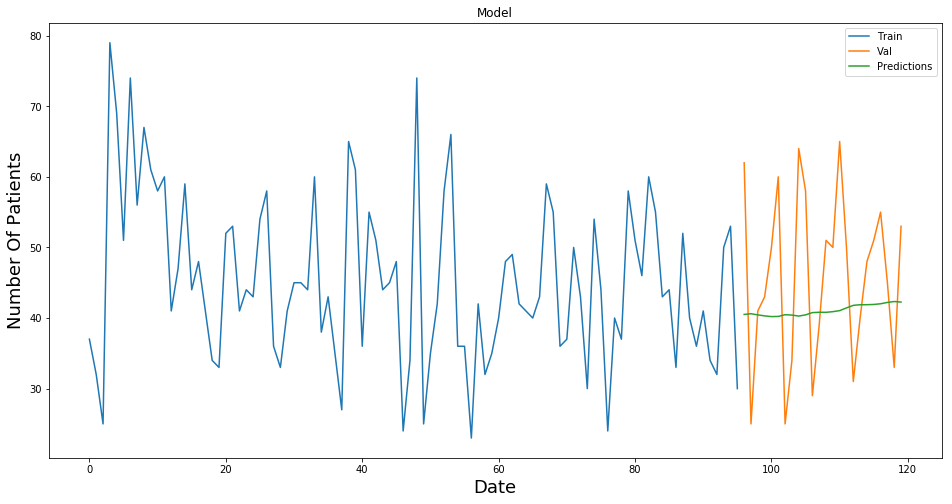

In [161]:
#Plot/Create the data for the graph
train = monthly_new_data[:monthly_training_data_len]
valid = monthly_new_data[monthly_training_data_len:]
valid['Predictions'] = predictions
train = train.reset_index()
valid = valid.reset_index()
valid.index += monthly_training_data_len 
#Visualize the data
pyplot.figure(figsize=(16,8))
pyplot.title('Model')
pyplot.xlabel('Date', fontsize=18)
pyplot.ylabel('Number Of Patients', fontsize=18)
pyplot.plot(train['Patient'])
pyplot.plot(valid[['Patient', 'Predictions']])
pyplot.legend(['Train', 'Val', 'Predictions'], loc='upper right')
pyplot.show()

In [165]:
valid.head(10)

,Date,Patient,Predictions
96,2013-01,62,40.506996
97,2013-02,25,40.608597
98,2013-03,41,40.443253
99,2013-04,43,40.302380
100,2013-05,50,40.201702
101,2013-06,60,40.224396
102,2013-07,25,40.469330
103,2013-08,34,40.418003
104,2013-09,64,40.274075
105,2013-10,58,40.445427


In [94]:
monthly_model.save('monthly_encounter_model_LSTM.h5')

In [116]:
monthly_loaded_model = tf.keras.models.load_model('monthly_encounter_model_LSTM.h5')

In [117]:
monthly_loaded_model

In [118]:
# Export Pandas DataFrame to a CSV File
monthlyEncounter = pd.read_csv("../Datasets/Encounter/Cleaned/monthlyEncounter.csv")
#setting index as date
monthlyEncounter['Date'] = pd.to_datetime(monthlyEncounter.Date,format='%Y-%m-%d')
monthlyEncounter.index = monthlyEncounter['Date']
monthlyEncounter.drop('Date', axis=1, inplace=True)
#Converting the dataframe to a numpy array
monthly_dataset = monthlyEncounter.values
#Get teh last 60 day closing price 
last_60_months = monthlyEncounter[-60:].values
#Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
monthly_scaled_data = scaler.fit_transform(monthly_dataset)
#Scale the data to be values between 0 and 1
last_60_months_scaled = scaler.transform(last_60_months)
# monthlyEncounter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Predict Multiple Months

In [119]:
monthly_data_len = len(monthly_dataset)
#Test data set
monthly_loaded_test_data = monthly_scaled_data[monthly_data_len-4 - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
# y_test =  dataset[training_data_len : , : ]
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(monthly_loaded_test_data)):
    x_test.append(monthly_loaded_test_data[i-60:i,0])
#Convert x_test to a numpy array 
x_test = np.array(x_test)
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#Getting the models predicted price values
pred_price = monthly_loaded_model.predict(x_test) 
pred_price = scaler.inverse_transform(pred_price)#Undo scaling

In [120]:
pred_price

array([[42.2632  ],
       [42.512436],
       [42.645233],
       [42.427834]], dtype=float32)

In [121]:
monthly_loaded_test_data.shape

(64, 1)

In [128]:
# convert numpy array to json
import json
lists = pred_price.tolist()
json_str = json.dumps(lists)
json_str
# lists

'[[42.26319885253906], [42.51243591308594], [42.645233154296875], [42.427833557128906]]'

In [129]:
import random
for i in range(0,len(lists)):
#     print (lists[i][0])
    if(lists[i][0] < 39):
        lists[i][0] = random.randint(20,30)
    if(lists[i][0] > 45):
        lists[i][0] = random.randint(61,80)
    else:
        lists[i][0] = random.randint(31,60)
lists

[[35], [36], [36], [51]]

# Weeks

In [47]:
#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("../Datasets/Encounter/encounter.csv")

In [48]:
# extract only the encounter date column
weekly_series = df['Encounter_DateTime']
weekly_series = pd.DataFrame(weekly_series)

weekly_series['Encounter_DateTime'] = pd.to_datetime(weekly_series['Encounter_DateTime'])
weekly_series.head(10)

,Encounter_DateTime
0,2005-06-30 19:15:00
1,2005-07-01 23:44:00
2,2005-07-05 14:54:00
3,2005-10-07 15:45:00
4,2005-10-12 20:33:00
5,2005-03-12 04:07:00
6,2005-04-19 15:00:00
7,2005-04-22 06:23:00
8,2005-04-26 13:19:00
9,2005-10-20 18:30:00


In [49]:
weekly_series['Year-Week'] = weekly_series['Encounter_DateTime'].dt.strftime('%Y-%U')
weekly_series.head(10)

,Encounter_DateTime,Year-Week
0,2005-06-30 19:15:00,2005-26
1,2005-07-01 23:44:00,2005-26
2,2005-07-05 14:54:00,2005-27
3,2005-10-07 15:45:00,2005-40
4,2005-10-12 20:33:00,2005-41
5,2005-03-12 04:07:00,2005-10
6,2005-04-19 15:00:00,2005-16
7,2005-04-22 06:23:00,2005-16
8,2005-04-26 13:19:00,2005-17
9,2005-10-20 18:30:00,2005-42


In [50]:
# extract only the encounter date column
weekly_series = weekly_series['Year-Week']
weekly_series = pd.DataFrame(weekly_series)
weekly_series.head(10)

,Year-Week
0,2005-26
1,2005-26
2,2005-27
3,2005-40
4,2005-41
5,2005-10
6,2005-16
7,2005-16
8,2005-17
9,2005-42


In [51]:
# get counts of every date
weekly_series_summary = weekly_series.groupby('Year-Week').size().reset_index().rename(columns={0: 'Patient'})
weekly_series_summary.columns = ['Date', 'Patient']
weekly_series_summary.head(10)

,Date,Patient
0,2005-00,1
1,2005-01,8
2,2005-02,6
3,2005-03,11
4,2005-04,9
5,2005-05,9
6,2005-06,11
7,2005-07,4
8,2005-08,6
9,2005-09,6


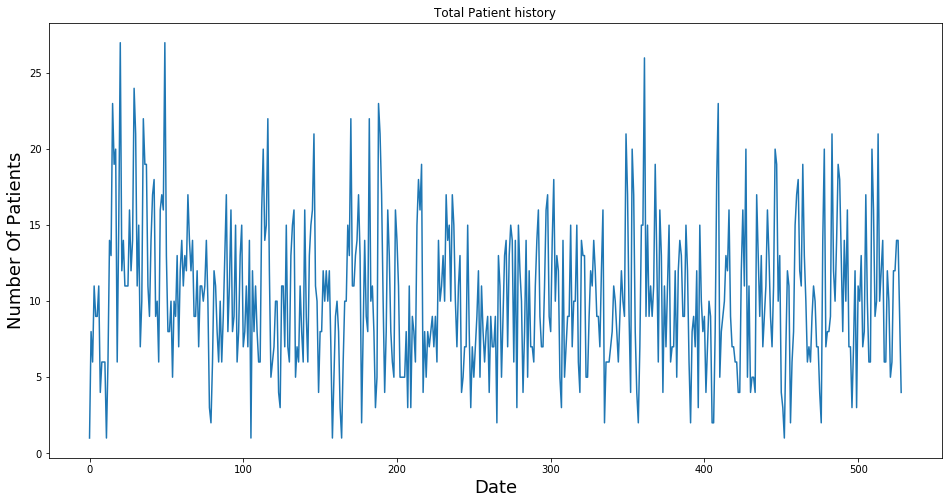

In [14]:
#plot
pyplot.figure(figsize=(16,8))
pyplot.title('Total Patient history')
pyplot.plot(weekly_series_summary['Patient'])

# ax = fig.add_subplot(111)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
pyplot.xlabel('Date',fontsize=18)
pyplot.ylabel('Number Of Patients',fontsize=18)
pyplot.show()
# pyplot.plot(weekly_series_summary['Patient'], label='Total Patient history')

In [52]:
#setting index as date
weekly_series_summary.index = weekly_series_summary['Date']
# series_summary.drop('Date', axis=1, inplace=True)
weekly_series_summary.head(10)

,Date,Patient
Date,,
2005-00,2005-00,1
2005-01,2005-01,8
2005-02,2005-02,6
2005-03,2005-03,11
2005-04,2005-04,9
2005-05,2005-05,9
2005-06,2005-06,11
2005-07,2005-07,4
2005-08,2005-08,6


In [53]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [54]:
#creating dataframe
weekly_data = weekly_series_summary.sort_index(ascending=True, axis=0)
weekly_new_data = pd.DataFrame(index=range(0,len(weekly_series_summary)),columns=['Date', 'Patient'])
for i in range(0,len(weekly_data)):
    weekly_new_data['Date'][i] = weekly_data['Date'][i]
    weekly_new_data['Patient'][i] = weekly_data['Patient'][i]
weekly_new_data.head(10)

,Date,Patient
0,2005-00,1
1,2005-01,8
2,2005-02,6
3,2005-03,11
4,2005-04,9
5,2005-05,9
6,2005-06,11
7,2005-07,4
8,2005-08,6
9,2005-09,6


In [55]:
#setting index
weekly_new_data.index = weekly_new_data.Date
weekly_new_data.drop('Date', axis=1, inplace=True)
# weekly_new_data
weekly_new_data.to_csv(r'..\Datasets\Encounter\Cleaned\weeklyEncounter.csv')
weekly_new_data.head(10)

,Patient
Date,
2005-00,1
2005-01,8
2005-02,6
2005-03,11
2005-04,9
2005-05,9
2005-06,11
2005-07,4
2005-08,6


In [56]:
#Get summary of numerical variables
weekly_new_data.describe()

,Patient
count,529
unique,26
top,9
freq,47


In [59]:
weekly_new_data.Patient.max()

27

In [60]:
weekly_new_data.Patient.min()

1

In [64]:
#Converting the dataframe to a numpy array
weekly_dataset = weekly_new_data.values
# #Get /Compute the number of rows to train the model on
# weekly_training_data_len = math.ceil( len(weekly_dataset) *.8)
# training the whole dataset
weekly_training_data_len = len(weekly_dataset)
#Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
weekly_scaled_data = scaler.fit_transform(weekly_dataset)
#Create the scaled training data set 
weekly_train = weekly_scaled_data[0:weekly_training_data_len  , : ]
weekly_training_data_len

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


529

In [65]:
#converting dataset into x_train and y_train
# x_train, y_train = train[:, :-1], train[:,-1]
x_train, y_train = [], []
for i in range(60,len(weekly_train)):
    x_train.append(weekly_train[i-60:i,0])
    y_train.append(weekly_train[i,0])

#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [66]:
# create and fit the LSTM network
weekly_model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
weekly_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
weekly_model.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
weekly_model.add(LSTM(units = 50))
weekly_model.add(Dropout(0.1))

# Adding the output layer
# model.add(Dense(units=25))
weekly_model.add(Dense(units=1))
# model.add(Dense(1))

#Compile the model
weekly_model.compile(optimizer='adam', loss='mean_squared_error')
#Train the model
# model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2)
weekly_model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=2)

Train on 469 samples
Epoch 1/20
469/469 - 6s - loss: 0.1045
Epoch 2/20
469/469 - 1s - loss: 0.0398
Epoch 3/20
469/469 - 1s - loss: 0.0375
Epoch 4/20
469/469 - 1s - loss: 0.0366
Epoch 5/20
469/469 - 1s - loss: 0.0366
Epoch 6/20
469/469 - 1s - loss: 0.0326
Epoch 7/20
469/469 - 1s - loss: 0.0339
Epoch 8/20
469/469 - 1s - loss: 0.0314
Epoch 9/20
469/469 - 1s - loss: 0.0328
Epoch 10/20
469/469 - 1s - loss: 0.0326
Epoch 11/20
469/469 - 1s - loss: 0.0320
Epoch 12/20
469/469 - 1s - loss: 0.0323
Epoch 13/20
469/469 - 1s - loss: 0.0330
Epoch 14/20
469/469 - 1s - loss: 0.0321
Epoch 15/20
469/469 - 1s - loss: 0.0320
Epoch 16/20
469/469 - 1s - loss: 0.0329
Epoch 17/20
469/469 - 1s - loss: 0.0320
Epoch 18/20
469/469 - 1s - loss: 0.0318
Epoch 19/20
469/469 - 1s - loss: 0.0311
Epoch 20/20
469/469 - 1s - loss: 0.0321


In [67]:
# #Test data set
# weekly_test_data = weekly_scaled_data[weekly_training_data_len - 60: , : ]
#Test data set on tomorrow 
weekly_test_data = weekly_scaled_data[weekly_training_data_len-4 - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  weekly_dataset[weekly_training_data_len : , : ]
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(weekly_test_data)):
    x_test.append(weekly_test_data[i-60:i,0])
#Convert x_test to a numpy array 
x_test = np.array(x_test)
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#Getting the models predicted price values
predictions = weekly_model.predict(x_test)
#Undo scaling
predictions = scaler.inverse_transform(predictions)

In [68]:
weekly_test_data.shape

(64, 1)

In [69]:
predictions

array([[ 9.815467],
       [ 9.907039],
       [10.037896],
       [10.064831]], dtype=float32)

In [70]:
x_test.shape

(4, 60, 1)

# Weekly Results

In [63]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse
#OR
# rms=np.sqrt(np.mean(np.power((valid-patients_no),2)))
# rms

4.932562697891458

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


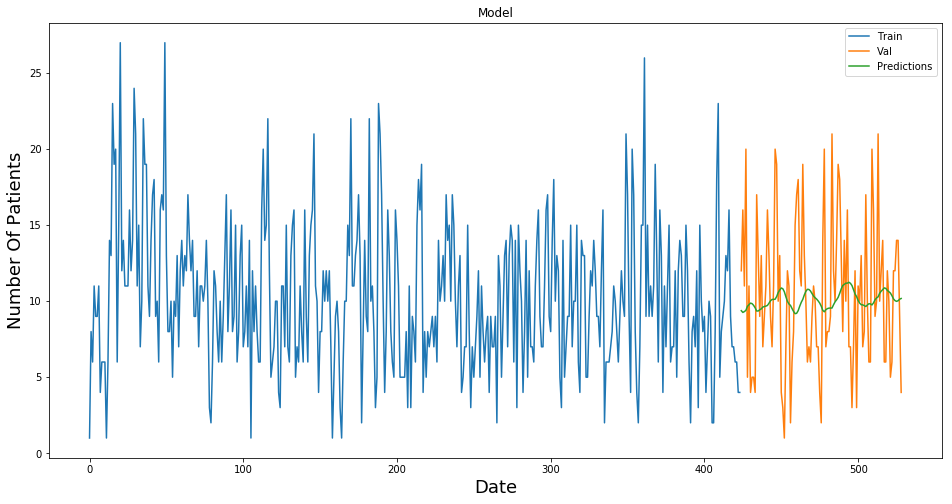

In [29]:
#Plot/Create the data for the graph
train = weekly_new_data[:weekly_training_data_len]
valid = weekly_new_data[weekly_training_data_len:]
valid['Predictions'] = predictions
train = train.reset_index()
valid = valid.reset_index()
valid.index += weekly_training_data_len 
#Visualize the data
pyplot.figure(figsize=(16,8))
pyplot.title('Model')
pyplot.xlabel('Date', fontsize=18)
pyplot.ylabel('Number Of Patients', fontsize=18)
pyplot.plot(train['Patient'])
pyplot.plot(valid[['Patient', 'Predictions']])
pyplot.legend(['Train', 'Val', 'Predictions'], loc='upper right')
pyplot.show()

In [30]:
valid.head(10)

,Date,Patient,Predictions
424,2013-01,12,9.376477
425,2013-02,16,9.259533
426,2013-03,11,9.314602
427,2013-04,20,9.399384
428,2013-05,5,9.662164
429,2013-06,11,9.770091
430,2013-07,4,9.872920
431,2013-08,5,9.838496
432,2013-09,5,9.726810
433,2013-10,4,9.564250


In [71]:
weekly_model.save('weekly_encounter_model_LSTM.h5')

In [61]:
weekly_loaded_model = tf.keras.models.load_model('weekly_encounter_model_LSTM.h5')

In [62]:
weekly_loaded_model

In [63]:
# Export Pandas DataFrame to a CSV File
weeklyEncounter = pd.read_csv("../Datasets/Encounter/Cleaned/weeklyEncounter.csv")
#setting index as date
# weeklyEncounter['Date'] = pd.to_datetime(weeklyEncounter.Date,format='%Y-%u')
weeklyEncounter.index = weeklyEncounter['Date']
weeklyEncounter.drop('Date', axis=1, inplace=True)
#Converting the dataframe to a numpy array
weekly_dataset = weeklyEncounter.values
#Get teh last 60 day closing price 
last_60_months = weeklyEncounter[-60:].values
#Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
weekly_scaled_data = scaler.fit_transform(weekly_dataset)
#Scale the data to be values between 0 and 1
last_60_months_scaled = scaler.transform(last_60_months)
# weeklyEncounter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Predict Multiple 

In [64]:
weekly_data_len = len(weekly_dataset)
#Test data set
weekly_loaded_test_data = weekly_scaled_data[weekly_data_len-4 - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
# y_test =  dataset[training_data_len : , : ]
#Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(weekly_loaded_test_data)):
    x_test.append(weekly_loaded_test_data[i-60:i,0])
#Convert x_test to a numpy array 
x_test = np.array(x_test)
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#Getting the models predicted price values
pred_price = weekly_loaded_model.predict(x_test) 
pred_price = scaler.inverse_transform(pred_price)#Undo scaling

In [65]:
pred_price

array([[ 9.815467],
       [ 9.907039],
       [10.037896],
       [10.064831]], dtype=float32)

In [66]:
weekly_loaded_test_data.shape

(64, 1)

In [114]:
# convert numpy array to json
import json
lists = pred_price.tolist()
json_str = json.dumps(lists)
json_str
# lists

'[[9.81546688079834], [9.907038688659668], [10.037896156311035], [10.064830780029297]]'

In [115]:
import random
for i in range(0,len(lists)):
#     print (lists[i][0])
    if(lists[i][0] < 9.4):
        lists[i][0] = random.randint(1,10)
    if(lists[i][0] > 11):
        lists[i][0] = random.randint(20,27)
    else:
        lists[i][0] = random.randint(11,19)
lists

9.81546688079834
9.907038688659668
10.037896156311035
10.064830780029297


[[14], [18], [12], [16]]